# **Retraining LeNet on MNIST Dataset**

In [22]:
# Importing the required libraries
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [23]:
# Device configuration - deciding whether to run the training on cpu or gpu 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [24]:
# MNIST dataset

# Download training and testing data, if not already downloaded inside the 'data' folder
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor()]), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor()]))

# Load train and test data
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

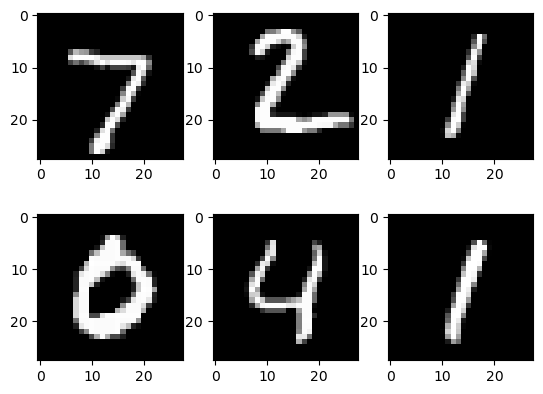

In [25]:
# View some of the images from the dataset using matplotlib
examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [26]:
# Defining the convolutional neural network (LeNet architecture)
class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1,6,5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2,2))
        self.layer2 = torch.nn.Sequential(
        torch.nn.Conv2d(6,16,5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2,2))
        self.fc = torch.nn.Linear(16 * 4 * 4, 120) # 16 feature maps of size 4x4 after convolutions and pooling
        self.relu = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(120, 84)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(84, 10)

    def forward(self, x):
        y = self.layer1(x)
        y = self.layer2(y)
        
        # Flatten feature maps before passing to fully connected layers
        y = y.view(y.shape[0], -1)
        
        y = self.fc(y)
        y = self.relu(y)
        y = self.fc1(y)
        y = self.relu1(y)
        y = self.fc2(y)
        return y

In [27]:
model = LeNet().to(device)
    
# Setting the loss function
cost = torch.nn.CrossEntropyLoss()
    
# Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) #Used during hyperparameter tuning.
    
# Printing how many steps are remaining when training
total_steps = len(train_loader)

In [28]:
# Training loop
for current_epoch in range(num_epochs):
        model.train()
        for idx, (train_x, train_label) in enumerate(train_loader):
            train_x = train_x.to(device)
            train_label = train_label.to(device)

            # Forward pass
            predict_y = model(train_x.float())
            loss = cost(predict_y, train_label.long())

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (idx+1) % 400 == 0:
                print (f'Epoch [{current_epoch+1}/{num_epochs}], Step [{idx+1}/{total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/10], Step [400/938], Loss: 2.2990
Epoch [1/10], Step [800/938], Loss: 2.2829
Epoch [2/10], Step [400/938], Loss: 1.1219
Epoch [2/10], Step [800/938], Loss: 0.4532
Epoch [3/10], Step [400/938], Loss: 0.4584
Epoch [3/10], Step [800/938], Loss: 0.2207
Epoch [4/10], Step [400/938], Loss: 0.1974
Epoch [4/10], Step [800/938], Loss: 0.1811
Epoch [5/10], Step [400/938], Loss: 0.2376
Epoch [5/10], Step [800/938], Loss: 0.1590
Epoch [6/10], Step [400/938], Loss: 0.1494
Epoch [6/10], Step [800/938], Loss: 0.0605
Epoch [7/10], Step [400/938], Loss: 0.1038
Epoch [7/10], Step [800/938], Loss: 0.0786
Epoch [8/10], Step [400/938], Loss: 0.1122
Epoch [8/10], Step [800/938], Loss: 0.1132
Epoch [9/10], Step [400/938], Loss: 0.0200
Epoch [9/10], Step [800/938], Loss: 0.1567
Epoch [10/10], Step [400/938], Loss: 0.0976
Epoch [10/10], Step [800/938], Loss: 0.0684
Finished Training


In [29]:
# Set the model to evaluation mode
model.eval()

# In the test phase, we don't compute gradients (for memory efficiency)
with torch.no_grad():
    all_correct_num = 0
    all_sample_num = 0
    for idx, (test_x, test_label) in enumerate(test_loader):
        test_x = test_x.to(device)
        test_label = test_label.to(device)
        predict_y = model(test_x.float()).detach()
        predict_y =torch.argmax(predict_y, dim=-1)
        current_correct_num = predict_y == test_label
        all_correct_num += torch.sum(current_correct_num).item()
        all_sample_num += current_correct_num.shape[0]
    acc = (all_correct_num / all_sample_num) * 100 
    print('Accuracy of the baseline model: {:.3f}'.format(acc), flush=True)
    print("Model finished training")

Accuracy of the baseline model: 97.740
Model finished training
